# Volume analysis

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.trend import SMAIndicator
import useful_functions as uf
import classification_report_generator as crg

In [2]:
df = pd.read_csv("../data/BTCUSDT-hour-target-classification.csv")

In [3]:
# Simple moving indicator
def get_sma(p=[20, 50, 200], get_diff=True, get_rate=True):
    """
    adds sma indicators to df
    p is period, recommended is [20, 50, 200]
    """
    for i in p:
        sma = SMAIndicator(close=df["volume"], window=i)
        name = "sma_" + str(i)
        df[name]=sma.sma_indicator()
    if get_diff:
        get_sma_diff(p)
    if get_rate:
        get_sma_rate(p)
        
# Simple moving indicator difference from close
def get_sma_diff(p=[20, 50, 200]):
    """
    adds sma-close
    """
    for i in p:
        c = df["volume"]
        sma = SMAIndicator(close=c, window=i)
        s = sma.sma_indicator()
        result = list(map(lambda x, y: x - y, c, s))
        name = "sma_diff_" + str(i)
        df[name] = result
        
# SMA rate
def get_sma_rate(p=[20, 50, 200]):
    """
    adds sma rate by taking difference: close-previous_close (for SMAs)
    """
    for i in p:
        sma = SMAIndicator(close=df["volume"], window=i)
        now = sma.sma_indicator()
        past = now.shift(1)
        name = "rate_sma_" + str(i)
        df[name] = list(map(none_subtraction, now, past))
        
def none_subtraction(x, y):
    """
    returns x-y and None if either are None
    """
    if x is None or y is None:
        return None
    else:
        return x-y

In [4]:
get_sma()

In [5]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,sma_rate,sma_20,sma_50,sma_200,sma_diff_20,sma_diff_50,sma_diff_200,rate_sma_20,rate_sma_50,rate_sma_200
0,2017-08-20 03:00:00.000,4111.26,4111.26,4094.62,4094.62,0.347647,1503201599999,1.428515e+03,3.0,0.347647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-20 04:00:00.000,4094.62,4094.62,4091.80,4093.00,0.809243,1503205199999,3.313402e+03,37.0,0.809243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-20 05:00:00.000,4087.00,4142.16,4087.00,4117.41,10.743056,1503208799999,4.412284e+04,69.0,9.067067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-20 06:00:00.000,4117.41,4117.41,4081.19,4115.41,2.915551,1503212399999,1.194553e+04,43.0,2.364551,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-20 07:00:00.000,4081.40,4156.56,4081.40,4155.87,14.136060,1503215999999,5.815740e+04,126.0,7.907226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,2021-05-08 15:00:00,58947.47,58947.48,57472.95,57599.87,5851.539191,1620489599999,3.408746e+08,140494.0,2843.709612,...,6.5712,2926.113924,3100.461114,2716.162660,2925.425267,2751.078077,3135.376531,160.197218,56.074426,18.042265
32458,2021-05-08 16:00:00,57599.86,58500.00,57560.63,58381.14,4739.339671,1620493199999,2.753576e+08,137969.0,2172.633797,...,24.5602,3044.098442,3145.366267,2730.705703,1695.241229,1593.973404,2008.633968,117.984518,44.905153,14.543043
32459,2021-05-08 17:00:00,58381.14,59050.45,58139.91,58898.98,3815.391269,1620496799999,2.241230e+08,108370.0,1870.545827,...,36.2098,3113.027433,3148.723627,2737.429655,702.363836,666.667642,1077.961614,68.928991,3.357360,6.723952
32460,2021-05-08 18:00:00,58901.45,59251.04,58901.45,59060.57,2937.039406,1620500399999,1.734920e+08,105800.0,1551.876404,...,46.8508,3082.287555,3131.864089,2742.947111,-145.248149,-194.824683,194.092295,-30.739877,-16.859538,5.517457


# Volume differences, rates, etc

In [6]:
dplot = df.copy()
dplot["log_v_sma_diff_o_close_50"] = list(map(lambda x, c: uf.log_abs(x/c), df["sma_diff_50"], df["close"]))
dplot["v_o_close"] = list(map(lambda v, c: uf.log_abs(v/c, zeros=True), df.volume, df.close))

In [7]:
wanted = list(df.columns)[11:20] # Base
# wanted = list(dplot.columns)[94:]
wanted.append("target")
wanted

['volume_adi',
 'volume_obv',
 'volume_cmf',
 'volume_fi',
 'volume_mfi',
 'volume_em',
 'volume_sma_em',
 'volume_vpt',
 'volume_nvi',
 'target']

In [8]:
dp = dplot[:100]

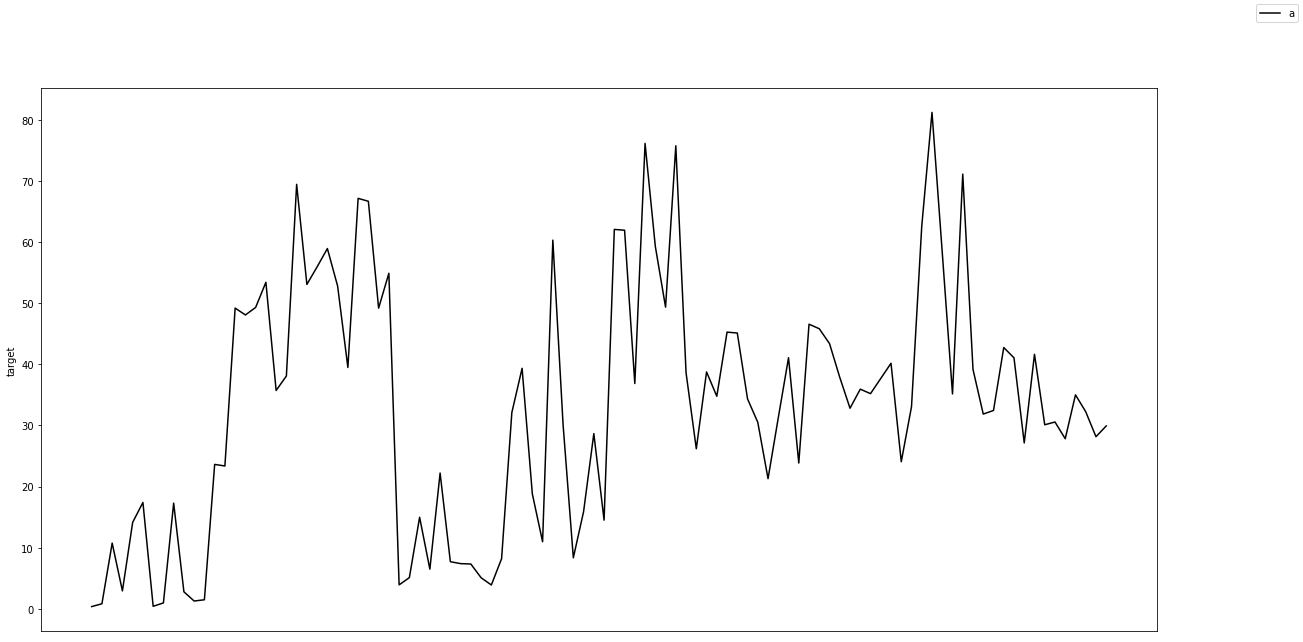

In [9]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(
        dp.volume,
        color="black")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
ax.axes.xaxis.set_visible(False)

# ax2=ax.twinx()
# ax2.plot(dp.timestamp,
#          dp.close,
#          color="green")
# # ax2.axhline(y=0, color='darkgreen', linestyle='-')
# ax2.set_ylabel("close")

fig.legend(["a", "b", "c", "d"])
plt.show()

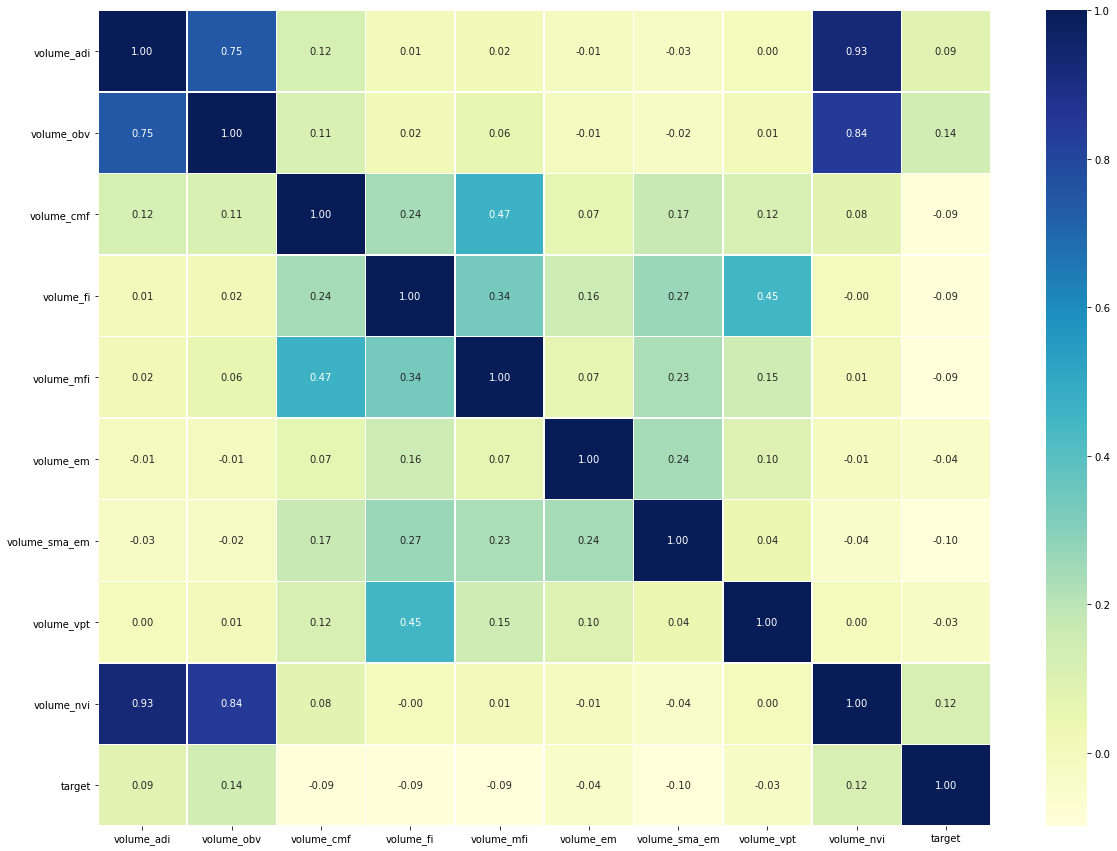

In [8]:
# Make a correlation matrix

# d = df.drop(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
#        'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore'], axis=1)

# d["target"] = get_target(df, span=200, cutoff_at=0.65)

d = dplot[list(wanted)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
# fig.savefig('corr-matrix.png')

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [23]:
# model = crg.train_model(X, y)
# def testt():
X_train, X_test, y_train, y_test = train_test_split(X,
                                                y,
                                                test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
generate_report(X_train, X_test, y_train, y_test)
# model = testt()

===========CROSS VALIDATED METRICS===========
accuracy: 0.4882597202409268


/Volumes/Storage/Programming/bitcoin-printer/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision: 0.04275670707070489
recall: 0.42562814070351757
f1: 0.0690581559767971


In [18]:
def cross_validated_metric(model, X, y, metric:str)->float:
    """
    returns the cross-validated (5) metric for any valid metric
    Common accepted ones: 
     - 'accuracy'
     - 'precision'
     - 'recall'
     - 'f1'
     """
    cv_metric = cross_val_score(model, X, y, cv=5, scoring=metric)
    return np.mean(cv_metric)

In [28]:
np.mean(cross_val_score(model, X, y, cv=5, scoring="accuracy"))

0.48465528875639236

In [25]:
test.to_csv("../data/testt.csv", index=False)

In [9]:
test = df[wanted].copy()
X = test.drop(["target"], axis=1)
y = test["target"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# np.random.seed(42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

d = {}
d["f1"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='f1'))
d["precision"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='precision'))
d["recall"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='recall'))
d["accuracy"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='accuracy'))
d

{'f1': 0.0648946016667144,
 'precision': 0.2420360624557018,
 'recall': 0.4381909547738694,
 'accuracy': 0.4902313871547908}

In [15]:
np.mean(cross_val_score(model, X, y, cv=5, scoring='precision'))

0.24233262341124556

In [10]:
crg.generate_report(X, y)

{'precision': 0.24350391299209515,
 'recall': 0.4306532663316583,
 'f1': 0.059437957021518016}

In [21]:
# Functions and constants
# Put models in a dictonary
def generate_report(X_train, X_test, y_train, y_test):
    """
    renerates report with default RandomForestClassifier paramaters
    """
    np.random.seed(42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    
    print("===========CROSS VALIDATED METRICS===========")
    print(f"accuracy: {cross_validated_metric(model, 'accuracy')}")
    print(f"precision: {cross_validated_metric(model, 'precision')}")
    print(f"recall: {cross_validated_metric(model, 'recall')}")
    print(f"f1: {cross_validated_metric(model, 'f1')}")
    
    

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    sns.set(font_scale = 1.5)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
def cross_validated_metric(model, metric:str)->float:
    """
    returns the cross-validated (5) metric for any valid metric
    Common accepted ones: 
     - 'accuracy'
     - 'precision'
     - 'recall'
     - 'f1'
     """
    cv_metric = cross_val_score(model, X, y, cv=5, scoring=metric)
    return np.mean(cv_metric)

## Past volumes

May look into volume mean

In [73]:
a = [5, 6, 7, 8]
b = a[-2:3]
b

[7]

In [105]:
def volume_mean(v:list[float], span=200):
    """
    get mean volume for past span units
    """
    acc = []
    for i in range(len(v)):
        if i-span >= 0:
            m = np.mean(v[i-span:i])
#             acc.append(m-v[i])
            acc.append(m)
        else:
            acc.append(None)
    return acc


In [112]:
dplot = df.copy()
# dplot["log_v_sma_diff_o_close_50"] = list(map(lambda x, c: uf.log_abs(x/c), df["sma_diff_50"], df["close"]))
# dplot["v_o_close"] = list(map(lambda v, c: uf.log_abs(v/c, zeros=True), df.volume, df.close))
dplot["volume_mean_200"] = volume_mean(dplot["volume"], span=200)
dplot["volume_mean_50"] = volume_mean(dplot["volume"], span=50)
dplot["volume_mean_20"] = volume_mean(dplot["volume"], span=20)

# dplot["volume_mean_o_close"] = list(map(lambda x, c: x/c, dplot.volume_mean, dplot.close))
                       

In [119]:
dplot["relative_volume_50"] = list(map(lambda v, vm: v/vm, dplot.volume, dplot.volume_mean_50))

In [120]:
# wanted = list(df.columns)[11:20] # Base
wanted = list(dplot.columns)[94:]
wanted.append("volume")
wanted.append("target")
wanted

['sma_20',
 'sma_50',
 'sma_200',
 'sma_diff_20',
 'sma_diff_50',
 'sma_diff_200',
 'rate_sma_20',
 'rate_sma_50',
 'rate_sma_200',
 'volume_mean_200',
 'volume_mean_50',
 'volume_mean_20',
 'volume_mean_1000',
 'volume_mean_10',
 'relative_volume_50',
 'volume',
 'target']

In [121]:
dp = dplot[:]

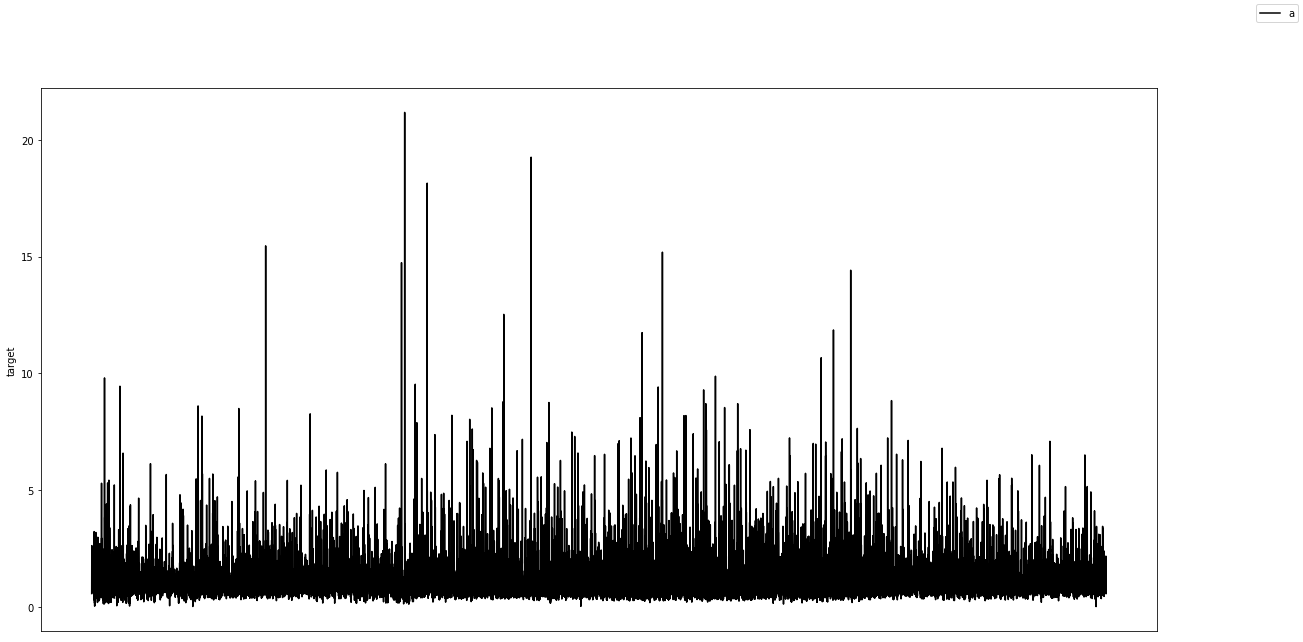

In [122]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(
        dp.relative_volume_50,
        color="black")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
ax.axes.xaxis.set_visible(False)

# ax2=ax.twinx()
# ax2.plot(
#          dp.volume_mean,
#          color="green")
# # ax2.axhline(y=0, color='darkgreen', linestyle='-')
# ax2.set_ylabel("close")

fig.legend(["a", "b", "c", "d"])
plt.show()

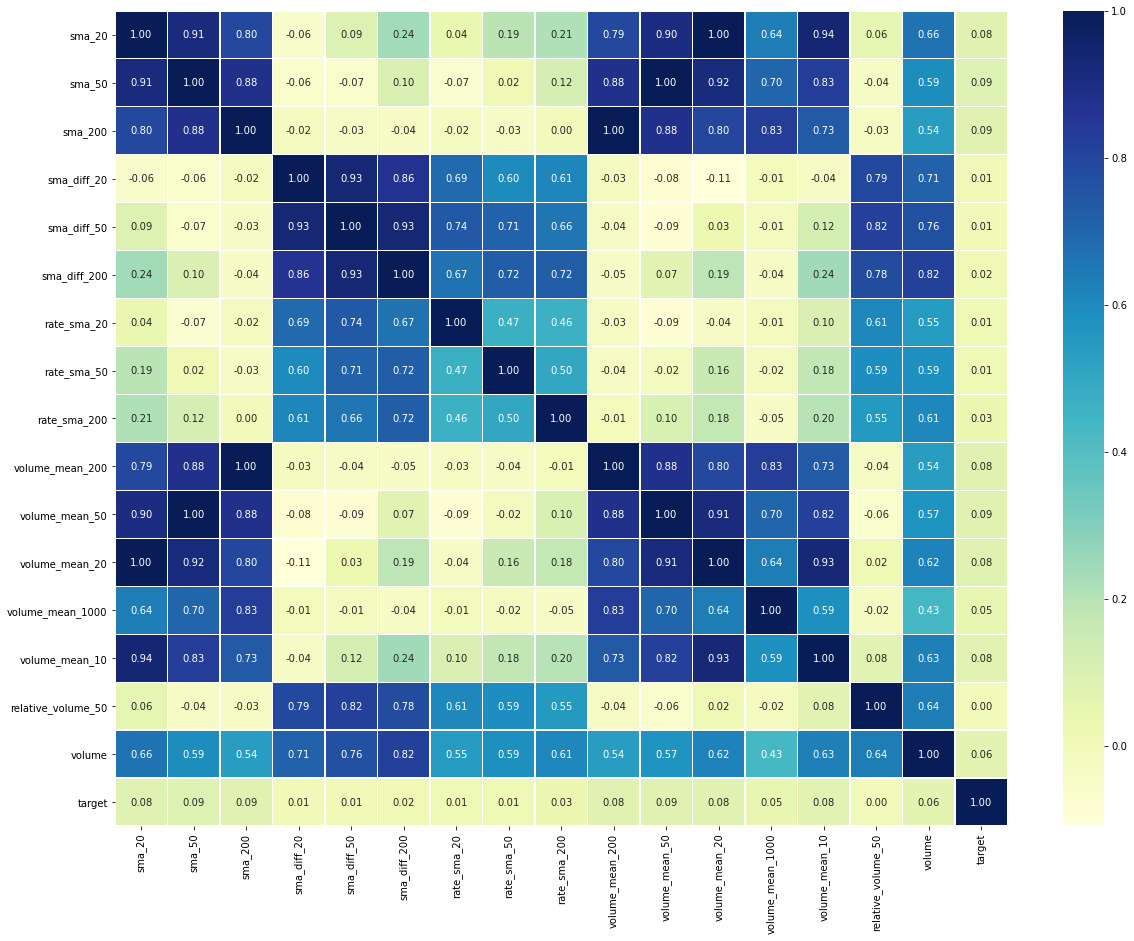

In [123]:
# Make a correlation matrix

# d = df.drop(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
#        'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore'], axis=1)

# d["target"] = get_target(df, span=200, cutoff_at=0.65)

d = dplot[list(wanted)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
# fig.savefig('corr-matrix.png')